# TRATAMIENTO Y LIMPIEZA DE DATOS.
Para ello vamos a:
1. Presentar y cargar datos.
2. Limpieza csv:

        -> Información general.

        -> Eliminar caracteres como # y @.
        
        -> Eliminar valores faltantes o nulos.

        -> Eliminar duplicados.
3. Analizar datos:

        -> Evolución de la cantidad de tweets en el tiempo.

        -> Visualizar tweets por región.
    
        -> Gráfico pastel sobre los tweets positivos, negativos y neutros.

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Presentamos el código.

In [24]:
df = pd.read_csv('covid19_tweets.csv')
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did ...,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. I...,NaN,Twitter Web App,False
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False


### 2. Limpieza del csv.

In [25]:
# info general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


In [26]:
# eliminar columnas que me parecen innecesarias
df.drop(['user_name', 'source', 'user_description', 'user_created', 'hashtags'], axis=1, inplace=True)


In [27]:
# eliminar caracteres como # y @
df = df.replace({'#': '', '@': ''}, regex=True)
df

,user_location,user_followers,user_friends,user_favourites,user_verified,date,text,is_retweet
0,astroworld,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,False
1,"New York, NY",2253,1677,24,True,2020-07-25 12:27:17,Hey Yankees YankeesPR and MLB - wouldn't it ha...,False
2,"Pewee Valley, KY",9275,9525,7254,False,2020-07-25 12:27:14,diane3443 wdunlap realDonaldTrump Trump never ...,False
3,Stuck in the Middle,197,987,1488,False,2020-07-25 12:27:10,brookbanktv The one gift COVID19 has give me i...,False
4,Jammu and Kashmir,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel CoronaVirusU...,False
...,...,...,...,...,...,...,...,...
179103,"Ilorin, Nigeria",412,1609,1062,False,2020-08-29 19:44:21,Thanks IamOhmai for nominating me for the WHO ...,False
179104,Ontario,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! COVID19 https...,False
179105,🇨🇦 Canada,1623,2160,98000,False,2020-08-29 19:44:15,CTVNews A powerful painting by Juan Lucena. It...,False
179106,New York City,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for COV...",False


In [28]:
# valores faltantes o nulos
df.isna().sum()

user_location      36771
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
is_retweet             0
dtype: int64

In [29]:
# eliminamos los valores faltantes o nulos
df.drop(df.dropna().index)

,user_location,user_followers,user_friends,user_favourites,user_verified,date,text,is_retweet
7,NaN,608,355,95,False,2020-07-25 12:27:00,You now have to wear face coverings when out s...,False
8,NaN,25,29,18,False,2020-07-25 12:26:59,Praying for good health and recovery of Chouha...,False
10,NaN,8,10,7,False,2020-07-25 12:26:53,49K+ Covid19 cases still no response from \ncb...,False
16,NaN,3987,53,749,False,2020-07-25 12:26:44,July 25 COVID19 update\nTamilNadu - 6988\nDisc...,False
18,NaN,46,108,453,False,2020-07-25 12:26:43,It is during our darkest moments that we must ...,False
...,...,...,...,...,...,...,...,...
179083,NaN,888,545,33,False,2020-08-29 19:45:02,Just a quick note for my lovely members. Soci...,False
179091,NaN,628,386,14845,False,2020-08-29 19:44:51,"dougmillsnyt realDonaldTrump FLOTUS ""The Trump...",False
179092,NaN,68,192,2455,False,2020-08-29 19:44:49,politvidchannel The Trump Administration's Inc...,False
179097,NaN,709,1158,95006,False,2020-08-29 19:44:35,politvidchannel Just not the lives of COVID19 ...,False


In [30]:
# eliminar duplicados
df.drop_duplicates()


,user_location,user_followers,user_friends,user_favourites,user_verified,date,text,is_retweet
0,astroworld,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,False
1,"New York, NY",2253,1677,24,True,2020-07-25 12:27:17,Hey Yankees YankeesPR and MLB - wouldn't it ha...,False
2,"Pewee Valley, KY",9275,9525,7254,False,2020-07-25 12:27:14,diane3443 wdunlap realDonaldTrump Trump never ...,False
3,Stuck in the Middle,197,987,1488,False,2020-07-25 12:27:10,brookbanktv The one gift COVID19 has give me i...,False
4,Jammu and Kashmir,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel CoronaVirusU...,False
...,...,...,...,...,...,...,...,...
179103,"Ilorin, Nigeria",412,1609,1062,False,2020-08-29 19:44:21,Thanks IamOhmai for nominating me for the WHO ...,False
179104,Ontario,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! COVID19 https...,False
179105,🇨🇦 Canada,1623,2160,98000,False,2020-08-29 19:44:15,CTVNews A powerful painting by Juan Lucena. It...,False
179106,New York City,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for COV...",False


### 3. Analizar datos.

##### Evolución de la cantidad de tweets en el tiempo.

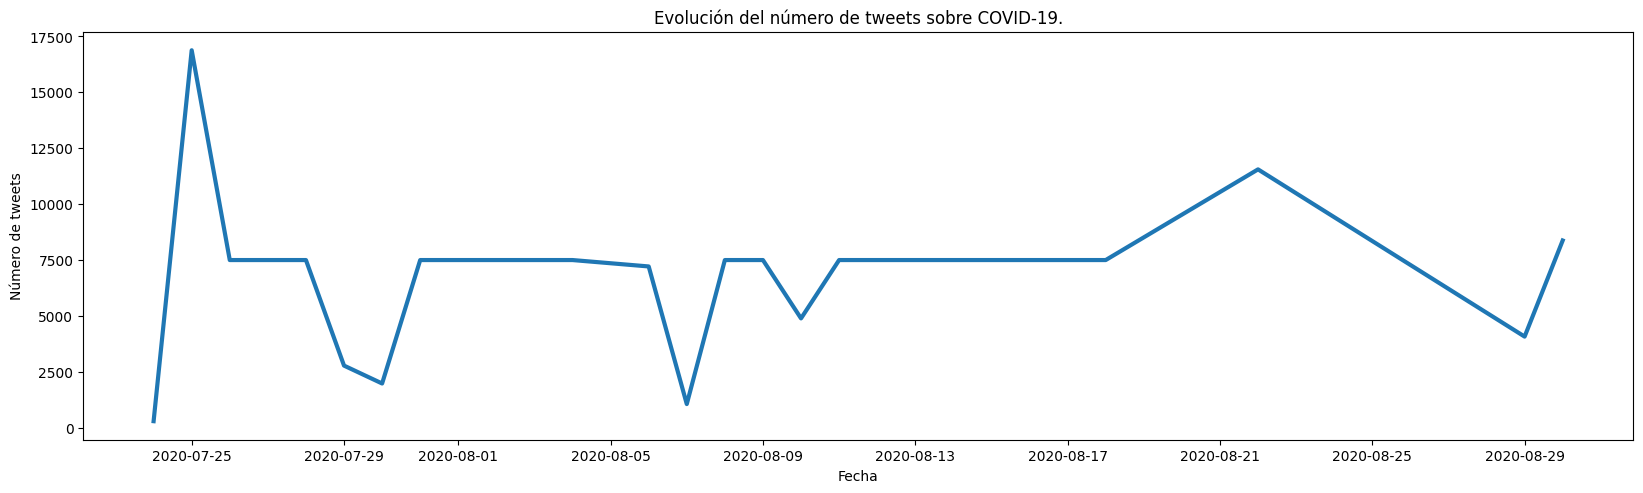

In [31]:
df['date'] = pd.to_datetime(df['date']).dt.date
tweets_por_dia = df.groupby('date').size()

fig, ax = plt.subplots(figsize=(20, 6))
plt.subplots_adjust(bottom=0.2)
plt.plot(tweets_por_dia.index, tweets_por_dia.values, '-', linewidth=3)
plt.title('Evolución del número de tweets sobre COVID-19.')
plt.xlabel('Fecha')
plt.ylabel('Número de tweets')
plt.show()


##### Visualizar tweets por región.

In [32]:
# agrupar tweets por región
tweets_por_region = df.dropna(subset = ['user_location'])
tweets_por_region = tweets_por_region['user_location'].value_counts()
print(tweets_por_region)


India                         3741
United States                 2455
New Delhi, India              1724
Mumbai, India                 1401
Washington, DC                1354
                              ... 
NYC.LA                           1
Social distance                  1
Badarpur, New Delhi              1
Canmore, Alberta, Canada         1
Aliwal North, South Africa       1
Name: user_location, Length: 26887, dtype: int64


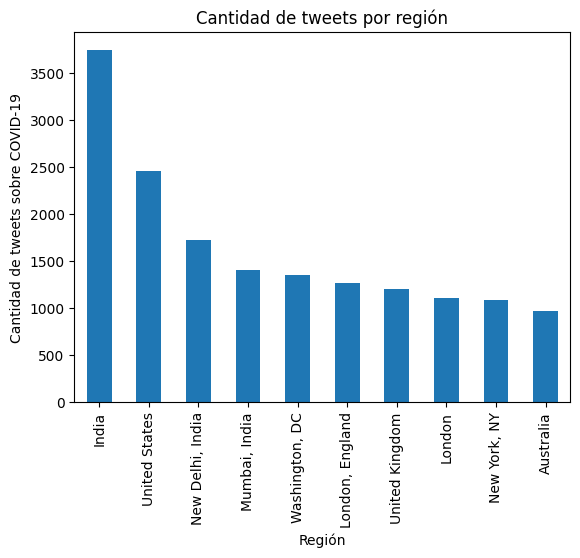

In [33]:
# crear el gráfico
tweets_por_region.head(10).plot(kind='bar')
plt.title('Cantidad de tweets por región')
plt.xlabel('Región')
plt.ylabel('Cantidad de tweets sobre COVID-19')
plt.show()

##### Gráfico pastel sobre los tweets positivos, negativos y neutros.

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aleja\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


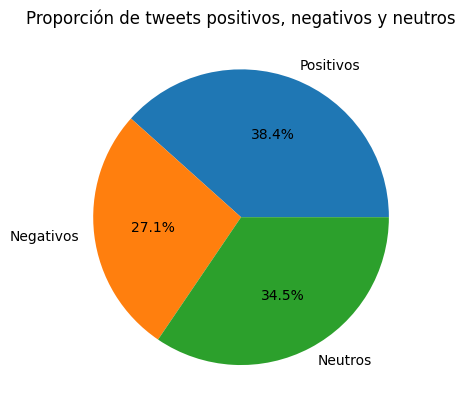

In [34]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

df['sentiment_score'] = df['text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# contar el número de tweets con puntuación de sentimiento positiva, negativa o neutra
positive_tweets = (df['sentiment_score'] > 0).sum()
negative_tweets = (df['sentiment_score'] < 0).sum()
neutral_tweets = (df['sentiment_score'] == 0).sum()

# crear el gráfico de pastel
plt.pie([positive_tweets, negative_tweets, neutral_tweets], labels=['Positivos', 'Negativos', 'Neutros'], autopct='%1.1f%%')
plt.title('Proporción de tweets positivos, negativos y neutros')
plt.show()